# samples analysis

In [1]:
import sys,os
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pylab as py
import pandas as pd
from tools.tools import load,save,checkdir
from tools.config import load_config,conf
from fitlab.resman import RESMAN
#from maxlike import ML
#import lhapdf
%matplotlib inline
import warnings
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
warnings.filterwarnings('ignore')
import copy

In [2]:
path='../'

In [23]:
runs=load('%s/summary.mcp'%path)

In [4]:
load_config('%s/inputs/upol_hermes_alexei.py'%path)
conf['resman']=RESMAN(mode='solo',ip=None,nworkers=None)

loading sidis data sets 1007

In [5]:
res=conf['resman'].get_residuals(conf['parman'].par)

In [49]:
res[0].size

807

In [6]:
runs.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'all']

In [7]:
print runs['all'].keys()

['nap', 'weights', 'nll', 'samples']


In [52]:
len(runs['all']['samples'])

6230

## study all the samples

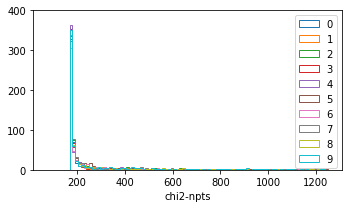

In [13]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*5,nrows*3))

ax=py.subplot(nrows,ncols,1)
for k in runs:
    if k=='all': continue
    ax.hist(2*runs[k]['nll']-res[0].size,bins=100,range=(75,1250),histtype='step',label=str(k));
ax.legend()
ax.set_ylim(0,400)
ax.set_xlabel('chi2-npts')
#ax.semilogx()
py.tight_layout()

In [14]:
tabs={}
for k in runs:
    tab={}
    tab['nll']=runs[k]['nll']
    tab['weights']=runs[k]['weights']
    samples=np.transpose(runs[k]['samples'])
    for i in range(len(conf['parman'].order)):
        _,kind,par=conf['parman'].order[i]
        #print par
        tab['%s-%s'%(kind,str(par))]=samples[i]
    tabs[k]=pd.DataFrame(tab)

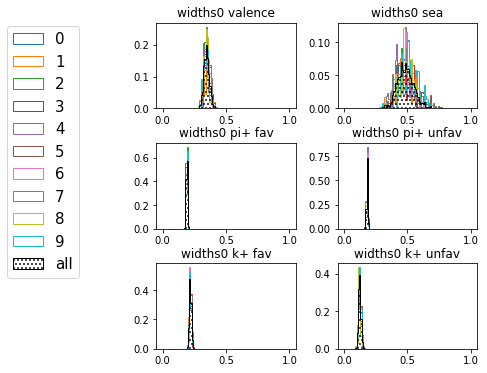

In [15]:
nrows,ncols=3,3
fig = py.figure(figsize=(ncols*3,nrows*2))


global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(len(tags)):
        cnt+=1
        if tags[i]==None: continue
        ax=py.subplot(nrows,ncols,cnt)
        kind,par=tags[i].split('-')
        if kind=='pdf': 
            vmin=conf['params']['pdf'][par]['min']
            vmax=conf['params']['pdf'][par]['max']
            R=(vmin,vmax)
        elif kind=='ff':
            vmin=conf['params']['ff'][par]['min']
            vmax=conf['params']['ff'][par]['max']
            R=(vmin,vmax)
        elif kind=='sidis':
            vmin=conf['datasets']['sidis']['norm'][int(par)]['min']
            vmax=conf['datasets']['sidis']['norm'][int(par)]['max']
            R=(vmin,vmax)

        for k in tabs:
            if k=='all': continue
            tab=tabs[k]
            ax.hist(tab[tags[i]],range=R,bins=100,weights=tab['weights'],histtype='step',label=str(k))
        ax.hist(tabs['all'][tags[i]],range=R,bins=100,\
                edgecolor='k',hatch='...',\
                weights=tabs['all']['weights'],histtype='step',label=str(k))
        ax.set_title(par)
        if cnt==2: ax.legend(bbox_to_anchor=(-0.5, 1.05),fontsize=15)

            
plot([None,'pdf-widths0 valence','pdf-widths0 sea'])
plot([None,'ff-widths0 pi+ fav','ff-widths0 pi+ unfav'])
plot([None,'ff-widths0 k+ fav','ff-widths0 k+ unfav'])
#plot(['sidis-1000','sidis-1001','sidis-1004'])

            
#plot([None,'pdf-g a','pdf-g b',None,None])
#plot([None,'pdf-uv a','pdf-uv b',None,'pdf-uv d'])
#plot([None,'pdf-dv a','pdf-dv b',None,None])
#plot(['pdf-db N','pdf-db a','pdf-db b',None,None])
#plot(['pdf-db2 N','pdf-db2 a',None,None,None])
#plot(['pdf-s N',None,None,None,None])
#plot(['dis-10010','dis-1000','dis-10016','dis-10017','dis-10020',])

py.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)


## analyze results aveger runs veto and cdf cut mcproc   -v 0,1  -c 0.001  .

# reduce number of samples based on cdfcut

In [24]:
cdfcut=0.001
weights=np.sort(runs['all']['weights'])
cdf0=[]
for i in range(weights.size):
    cdf0.append(np.sum(weights[:i+1]))
cdf=[cdf0[i]  for i in range(weights.size)  if cdf0[i]>cdfcut]
idx=[i  for i in range(weights.size)  if cdf0[i]>cdfcut]

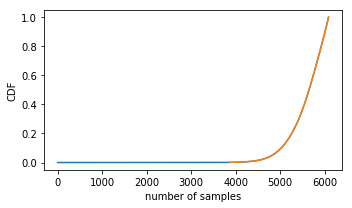

In [25]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*5,nrows*3))

ax=py.subplot(nrows,ncols,1)
ax.plot(range(len(cdf0)),cdf0)
ax.plot(idx,cdf)

ax.set_ylabel('CDF')
ax.set_xlabel('number of samples')
py.tight_layout()

In [26]:
final=load('%s/final.mcp'%path)
print len(final['samples'])

2225


In [27]:
tab={}
tab['weights']=final['weights']
samples=np.transpose(final['samples'])
for i in range(len(conf['parman'].order)):
    _,kind,par=conf['parman'].order[i]
    #print par
    tab['%s-%s'%(kind,str(par))]=samples[i]
tab=pd.DataFrame(tab)

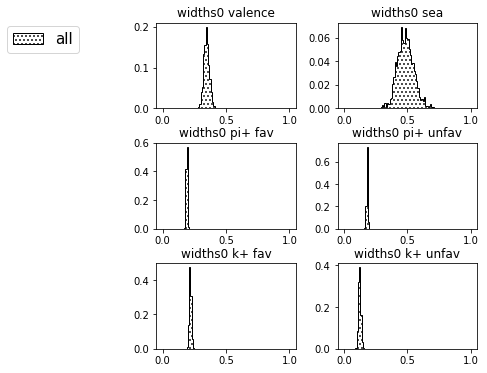

In [28]:
nrows,ncols=3,3
fig = py.figure(figsize=(ncols*3,nrows*2))


global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(len(tags)):
        cnt+=1
        if tags[i]==None: continue
        ax=py.subplot(nrows,ncols,cnt)
        kind,par=tags[i].split('-')
        if kind=='pdf': 
            vmin=conf['params']['pdf'][par]['min']
            vmax=conf['params']['pdf'][par]['max']
            R=(vmin,vmax)
        elif kind=='ff':
            vmin=conf['params']['ff'][par]['min']
            vmax=conf['params']['ff'][par]['max']
            R=(vmin,vmax)
        elif kind=='sidis':
            vmin=conf['datasets']['sidis']['norm'][int(par)]['min']
            vmax=conf['datasets']['sidis']['norm'][int(par)]['max']
            R=(vmin,vmax)

        ax.hist(tab[tags[i]],range=R,bins=100,\
                edgecolor='k',hatch='...',\
                weights=tab['weights'],histtype='step',label=str(k))
        ax.set_title(par)
        if cnt==2: ax.legend(bbox_to_anchor=(-0.5, 1.05),fontsize=15)

            
plot([None,'pdf-widths0 valence','pdf-widths0 sea'])
plot([None,'ff-widths0 pi+ fav','ff-widths0 pi+ unfav'])
plot([None,'ff-widths0 k+ fav','ff-widths0 k+ unfav'])
 

py.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)